## 2D Ising Model

In [1]:
import jax.numpy as jnp
from jax import random
import jax_ising_class as IM
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import clear_output

In [2]:
# system parameters, as fixed by user
n = 50          # number of sites given by n x n (square)
T = 1           # temperature
nstep = 3000   # the 'time' for this dynamical evolution
dynamics = 'K'  # G : Glauber , K : Kawasaki

key = random.PRNGKey(0) # reproducibility

# initialise lattice sites
lattice = random.choice(key, jnp.array([-1, 1]), shape=(n, n))

system = IM.IsingLattice(lattice, T) # initial system

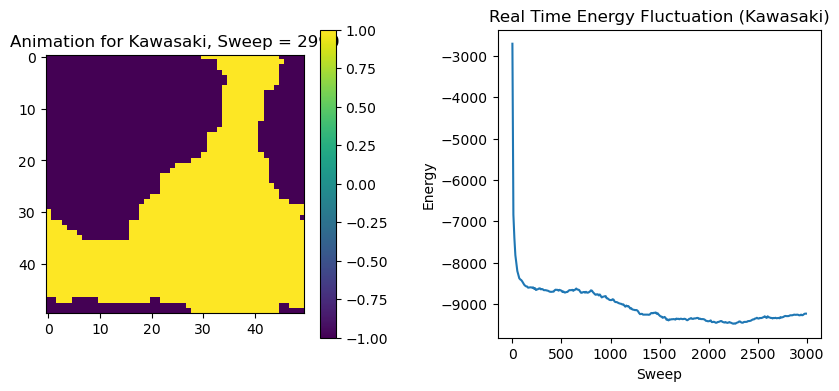

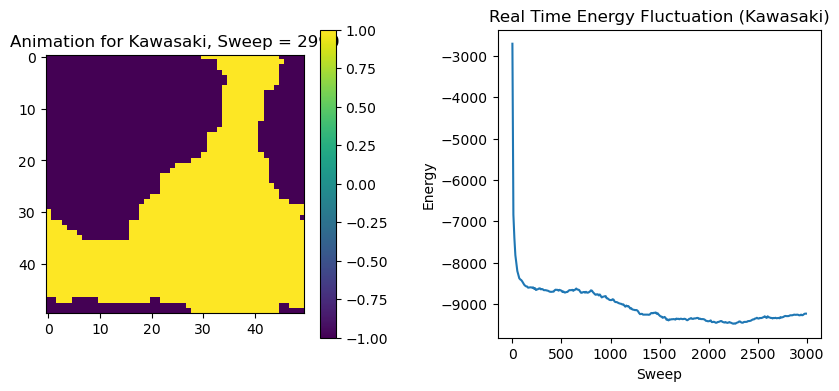

In [3]:
energy_list = []
magnetisation_list = []
time_list = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)
im = ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax1)
line, = ax2.plot([], [])  # empty line plot to start

if dynamics == 'G':
    print('Simulate with Glauber dynamics.')
    print('Sweep, Energy, Magnetisation')
    for sweep in range(nstep):
        key, subkey = random.split(key)
        system.perform_glauber_sweep(subkey)

        #occasionally plot or update measurements
        if (sweep%10) == 0:
            # update measurements
            energy_list.append(system.energy)
            magnetisation_list.append(system.magnetisation)
            time_list.append(sweep)

            # show animation
            ax1.cla()
            im=ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            ax1.set_title(f'Animation for Glauber, Sweep = {sweep}')

            # update states graph
            ax2.cla()  # clear the axes
            ax2.plot(time_list, energy_list)
            ax2.relim()  # recalculate limits
            ax2.autoscale_view()  # autoscale the view
            ax2.set_title(f'Real Time Energy Fluctuation (Glauber)')
            ax2.set_xlabel('Sweep')
            ax2.set_ylabel('Energy')

            clear_output(wait=True)
            display(fig)

if dynamics == 'K':
    print('Simulate with Kawasaki dynamics.')
    print('Sweep, Energy, Magnetisation')
    for sweep in range(nstep):
        key, subkey = random.split(key)
        system.perform_kawasaki_sweep(subkey)

        #occasionally plot or update measurements
        if (sweep%10) == 0:
            # update measurements
            energy_list.append(system.energy)
            magnetisation_list.append(system.magnetisation)
            time_list.append(sweep)

            # show animation
            ax1.cla()
            im=ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            ax1.set_title(f'Animation for Kawasaki, Sweep = {sweep}')

            # update states graph
            ax2.cla()  # clear the axes
            ax2.plot(time_list, energy_list)
            ax2.relim()  # recalculate limits
            ax2.autoscale_view()  # autoscale the view
            ax2.set_title(f'Real Time Energy Fluctuation (Kawasaki)')
            ax2.set_xlabel('Sweep')
            ax2.set_ylabel('Energy')

            clear_output(wait=True)
            display(fig)